In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
import seaborn as sns
from sklearn import svm

import pandas as pd
from helper import get_news_dataset, get_data, create_classes

pd.options.display.max_columns = None

from sklearn.ensemble import RandomForestRegressor

from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import LogisticRegression

#Encoding schtuff
from sklearn import preprocessing
from sklearn import utils


# Preprocessing libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


# metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from math import sqrt

## Import Dataset

In [2]:
DATA_SET_URL = ["https://www.dropbox.com/sh/euppz607r6gsen2/AACYNkq6O4UEjacsBy6FhT6La/Wine%20Quality%20Ratings%20and%20Chemicals?dl=1"]
DATA_SET = "./data/winequality-white.csv"

## Load Dataset

In [3]:
get_data(DATA_SET_URL)
data = pd.read_csv(DATA_SET, delimiter=";")
# data = pd.read_csv(data_path, error_bad_lines=False, encoding="ISO-8859-1") 
data.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6


## Understanding the data

#### Correlation of Features

In [4]:
def plot_pearson_correlation_of_features(train):
    colormap = plt.cm.viridis
    plt.figure(figsize=(14,12))
    plt.title('Pearson Correlation of Features', y=1.05, size=15)
    sns.heatmap(train.astype(float).corr(),linewidths=0.5,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    plt.show()

In [5]:
def plot_correlation_features_against_target(train, target):
    for column in train:
        color = np.random.rand(3,)
        plt.scatter(train[column], train[target], color=color)
        plt.title(column + " against " + target)
        plt.xlabel(column)
        plt.ylabel(target)
        plt.show()

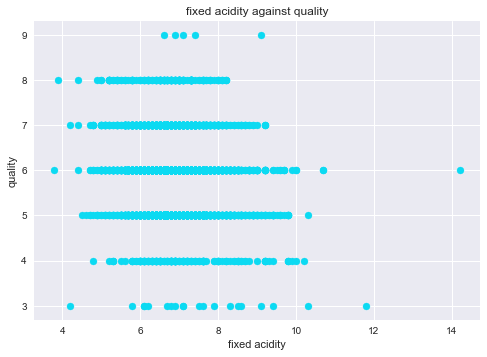

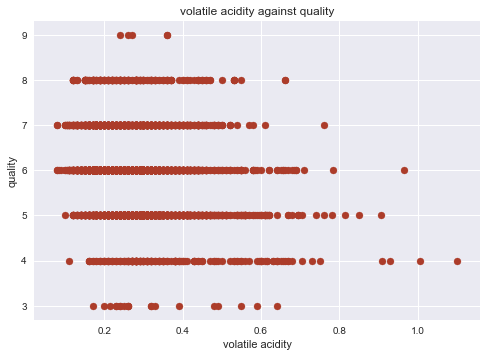

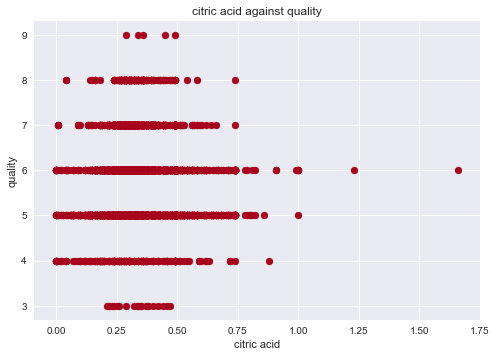

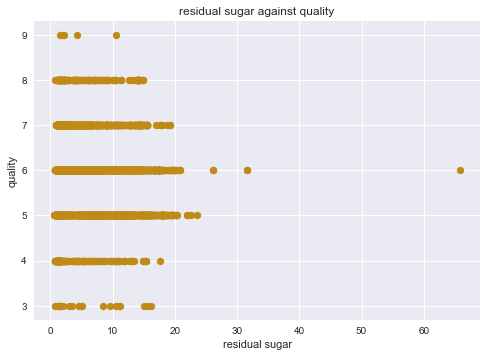

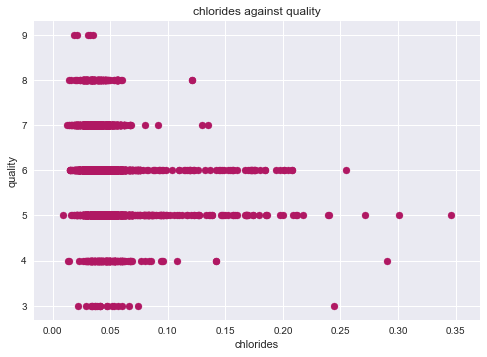

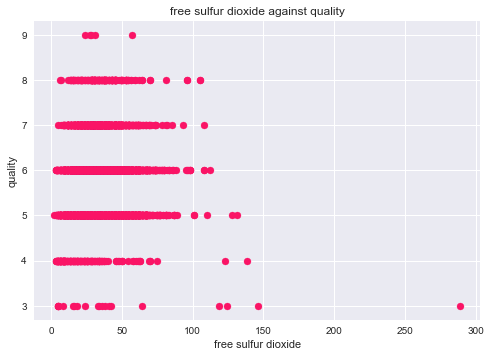

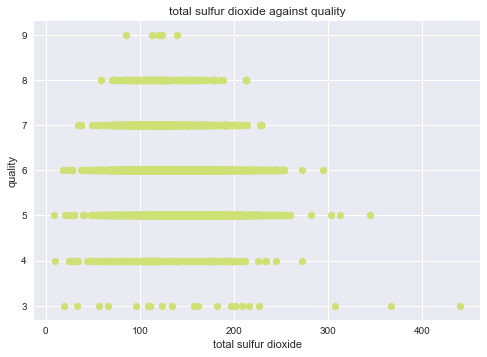

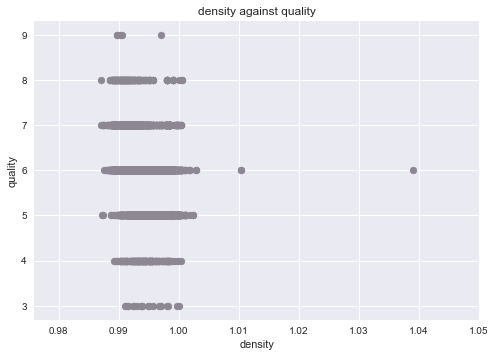

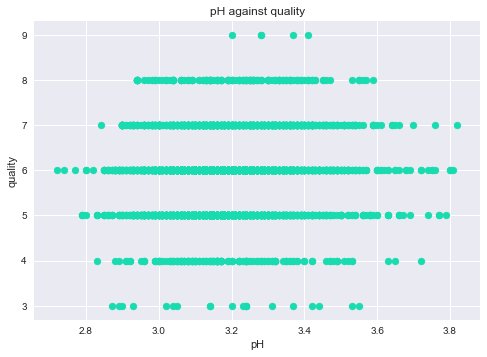

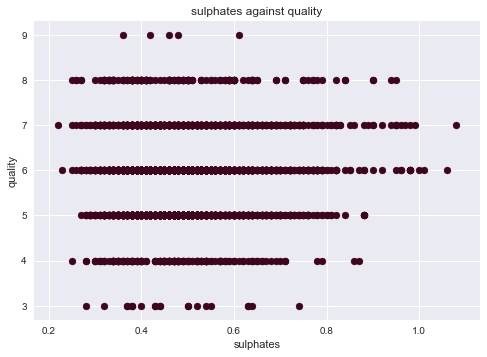

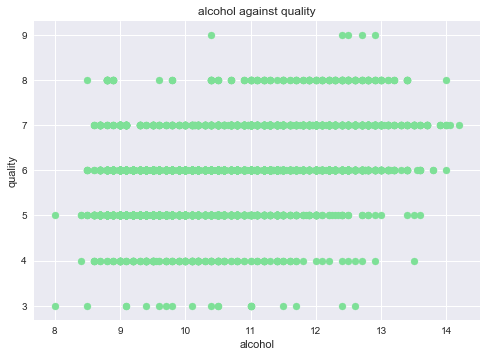

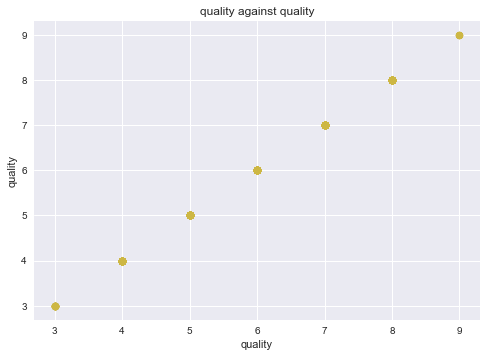

In [6]:
plot_correlation_features_against_target(data, "quality")

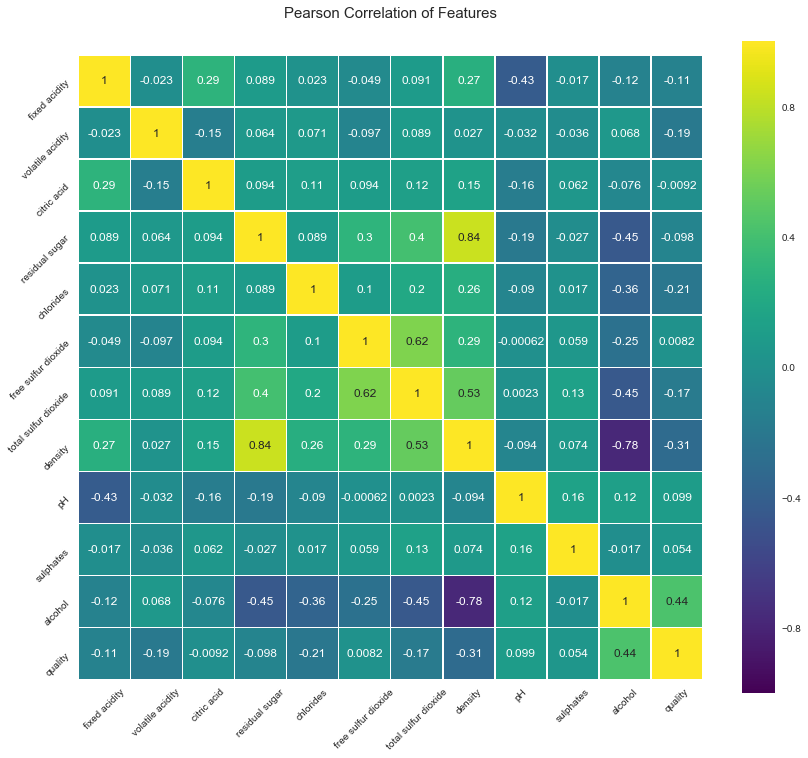

In [7]:
plot_pearson_correlation_of_features(data)

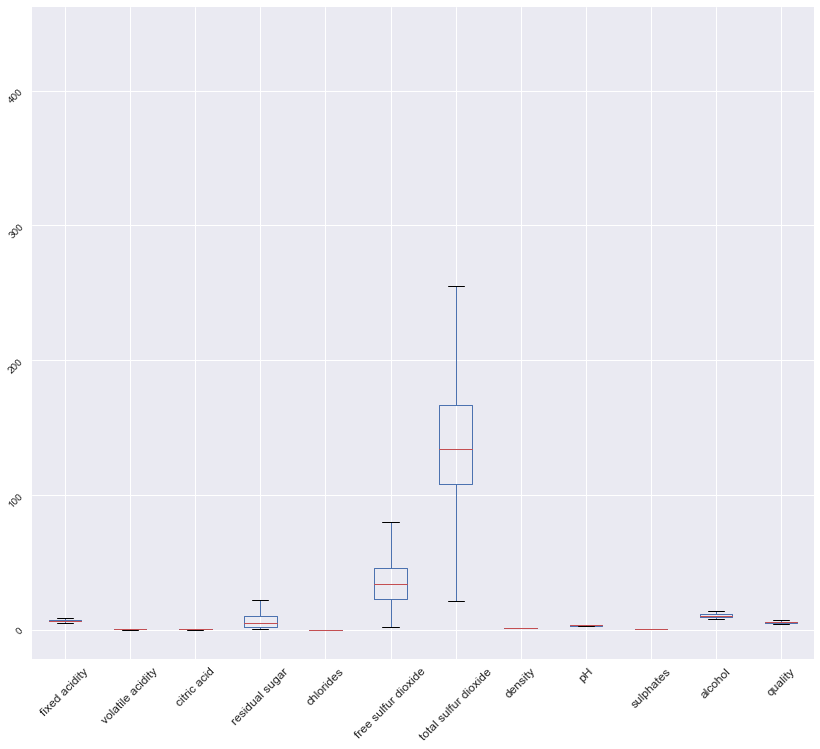

In [8]:


plt.figure(figsize=(14,12))
data.boxplot()
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

## Evaluation

In [9]:
data = pd.read_csv(DATA_SET, delimiter=";")


In [10]:
Y = data["quality"]
X = data.iloc[:,:-1]

In [11]:
 

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

 

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
 
classifier = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
score = classifier.score(X_test, y_test)
    
print(score)

(3428, 11) (3428,)
(1470, 11) (1470,)


KeyboardInterrupt: 

### SVM plotting the validation curve for gamma with cross validation

In [ ]:
param_range

In [ ]:
param_range = np.logspace(-6, -1, 5)
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
train_scores, test_scores = validation_curve(
     svm.SVC(), X,Y, param_name="gamma", param_range=param_range,
    cv=10, scoring="accuracy", n_jobs=-1)


train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

In [ ]:
plt.title("Validation Curve with SVM")
plt.xlabel("$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, 1-train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
# plt.fill_between(param_range, train_scores_mean - train_scores_std,
#                  train_scores_mean + train_scores_std, alpha=0.2,
#                  color="darkorange", lw=lw)
plt.semilogx(param_range, 1- test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
# plt.fill_between(param_range, test_scores_mean - test_scores_std,
#                  test_scores_mean + test_scores_std, alpha=0.2,
#                  color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

#### Random Forest

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [18]:
clf = RandomForestClassifier(n_jobs=2, random_state=0)

In [19]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=2, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [20]:
clf.score(X_test,y_test)

0.64013605442176869

In [21]:
clf.feature_importances_

array([ 0.08039778,  0.10725514,  0.07706514,  0.08463619,  0.08095676,
        0.0994259 ,  0.09140769,  0.10894489,  0.0853047 ,  0.07752737,
        0.10707844])

In [22]:
features = list(zip(data.columns.values[:-1], clf.feature_importances_))

In [23]:
sorted(features,key=lambda tup: tup[1],reverse=True)

[('density', 0.10894489193515859),
 ('volatile acidity', 0.10725514111598891),
 ('alcohol', 0.10707844203718642),
 ('free sulfur dioxide', 0.099425903428375872),
 ('total sulfur dioxide', 0.091407690322718699),
 ('pH', 0.085304700345785051),
 ('residual sugar', 0.084636190363419406),
 ('chlorides', 0.0809567555637071),
 ('fixed acidity', 0.080397781045933495),
 ('sulphates', 0.077527367022001081),
 ('citric acid', 0.077065136819725405)]

#### Sklearn feature ranking with recursive feature elimination on SVC
We can use SVC as the estimator for finding the important features. Features with low weights are removed from the feature set

http://blog.datadive.net/selecting-good-features-part-iv-stability-selection-rfe-and-everything-side-by-side/

In [14]:
from sklearn.feature_selection import RFE

In [18]:
import datetime
time_now = datetime.datetime.now()

In [25]:
from sklearn.feature_selection import  RFECV

estimator = svm.SVC(kernel='linear', C=1)
selector =  RFECV(estimator, step = 1, cv=5, n_jobs=-1)
selector.fit(X, Y)
selector.support_



array([ True,  True,  True,  True,  True, False, False,  True,  True,
        True,  True], dtype=bool)

In [26]:
time_now1 = datetime.datetime.now()
#9:13
time_now1- time_now

datetime.timedelta(0, 4188, 177945)

In [28]:
sorted(list(zip(selector.ranking_,data.columns.values[:-1])))

[(1, 'alcohol'),
 (1, 'chlorides'),
 (1, 'citric acid'),
 (1, 'density'),
 (1, 'fixed acidity'),
 (1, 'pH'),
 (1, 'residual sugar'),
 (1, 'sulphates'),
 (1, 'volatile acidity'),
 (2, 'free sulfur dioxide'),
 (3, 'total sulfur dioxide')]

In [24]:
selector.support_

AttributeError: 'RFECV' object has no attribute 'support_'

#### Gridsearch with  10 fold CV

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}

In [ ]:
clf = GridSearchCV(SVC, parameters )

In [ ]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
iris = datasets.load_iris()
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(X, Y)

In [ ]:
clf.cv_results_

In [ ]:
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}